**Data Preprocessing**

In [9]:
import pandas as pd

#Load in the Data
demographics_df = pd.read_csv('C:/Users/prian/OneDrive/Desktop/Classes/FDS/HW2/telecom_demographics.csv')
usage_df = pd.read_csv('C:/Users/prian/OneDrive/Desktop/Classes/FDS/HW2/telecom_usage.csv')

#Merge the two datasets using customer_id
merged_df = pd.merge(demographics_df, usage_df, on='customer_id')

#Drop columns that are not useful for prediction (customer_id, pincode, registration_event)
columns_to_drop = ['customer_id', 'pincode', 'registration_event']
cleaned_df = merged_df.drop(columns=columns_to_drop)

#Display the first few rows after dropping columns
print(cleaned_df.head())

#Check for missing values
print(cleaned_df.isnull().sum())

#Handle missing values in numerical columns (filling with mean)
for column in cleaned_df.select_dtypes(include=['float64', 'int64']).columns:
    cleaned_df[column].fillna(cleaned_df[column].mean(), inplace=True)

#Handle missing values in categorical columns (filling with mode)
for column in cleaned_df.select_dtypes(include=['object']).columns:
    cleaned_df[column].fillna(cleaned_df[column].mode()[0], inplace=True)

#Verify no missing values remain
print(cleaned_df.isnull().sum())



  telecom_partner gender  age             state       city  num_dependents   
0          Airtel      F   26  Himachal Pradesh      Delhi               4  \
1          Airtel      F   74       Uttarakhand  Hyderabad               0   
2          Airtel      F   54         Jharkhand    Chennai               2   
3    Reliance Jio      M   29             Bihar  Hyderabad               3   
4        Vodafone      M   45          Nagaland  Bangalore               4   

   estimated_salary  calls_made  sms_sent  data_used  churn  
0             85979          75        21       4532      1  
1             69445          35        38        723      1  
2             75949          70        47       4688      1  
3             34272          95        32      10241      1  
4             34157          66        23       5246      1  
telecom_partner     0
gender              0
age                 0
state               0
city                0
num_dependents      0
estimated_salary    0
calls

**Encoding Categorical Variables**


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Apply OneHotEncoder to categorical columns
categorical_columns = ['telecom_partner', 'city', 'state', 'gender']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform categorical data
encoded_onehot = onehot_encoder.fit_transform(cleaned_df[categorical_columns])

# Convert encoded data to a DataFrame and concatenate with the original dataset
onehot_encoded_df = pd.DataFrame(encoded_onehot, columns=onehot_encoder.get_feature_names_out(categorical_columns))
cleaned_onehot_df = pd.concat([cleaned_df.drop(columns=categorical_columns), onehot_encoded_df], axis=1)

# Display the transformed dataset
print(cleaned_onehot_df.head())

# Apply OrdinalEncoder to categorical columns
ordinal_encoder = OrdinalEncoder()

# Fit and transform categorical data
encoded_ordinal = ordinal_encoder.fit_transform(cleaned_df[categorical_columns])

# Convert encoded data to a DataFrame and concatenate with the original dataset
ordinal_encoded_df = pd.DataFrame(encoded_ordinal, columns=categorical_columns)
cleaned_ordinal_df = pd.concat([cleaned_df.drop(columns=categorical_columns), ordinal_encoded_df], axis=1)

# Display the transformed dataset
print(cleaned_ordinal_df.head())


   age  num_dependents  estimated_salary  calls_made  sms_sent  data_used   
0   26               4             85979          75        21       4532  \
1   74               0             69445          35        38        723   
2   54               2             75949          70        47       4688   
3   29               3             34272          95        32      10241   
4   45               4             34157          66        23       5246   

   churn  telecom_partner_BSNL  telecom_partner_Reliance Jio   
0      1                   0.0                           0.0  \
1      1                   0.0                           0.0   
2      1                   0.0                           0.0   
3      1                   0.0                           1.0   
4      1                   0.0                           0.0   

   telecom_partner_Vodafone  ...  state_Punjab  state_Rajasthan  state_Sikkim   
0                       0.0  ...           0.0              0.0        

**Scaling Numerical Features**

In [14]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_columns = ['calls_made', 'age', 'estimated_salary', 'sms_sent']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
cleaned_onehot_df[numerical_columns] = scaler.fit_transform(cleaned_onehot_df[numerical_columns])
cleaned_ordinal_df[numerical_columns] = scaler.fit_transform(cleaned_ordinal_df[numerical_columns])

# Display the scaled datasets
print(cleaned_onehot_df.head())
print(cleaned_ordinal_df.head())


        age  num_dependents  estimated_salary  calls_made  sms_sent   
0 -1.222970               4          0.011981    0.846076 -0.222385  \
1  1.696304               0         -0.428423   -0.496344  0.938056   
2  0.479940               2         -0.255181    0.678273  1.552407   
3 -1.040515               3         -1.365302    1.517286  0.528489   
4 -0.067424               4         -1.368365    0.544031 -0.085862   

   data_used  churn  telecom_partner_BSNL  telecom_partner_Reliance Jio   
0       4532      1                   0.0                           0.0  \
1        723      1                   0.0                           0.0   
2       4688      1                   0.0                           0.0   
3      10241      1                   0.0                           1.0   
4       5246      1                   0.0                           0.0   

   telecom_partner_Vodafone  ...  state_Punjab  state_Rajasthan  state_Sikkim   
0                       0.0  ...         

**Model Building**

Decision Tree with max_depth=3: Accuracy = 0.79
Decision Tree with max_depth=5: Accuracy = 0.79


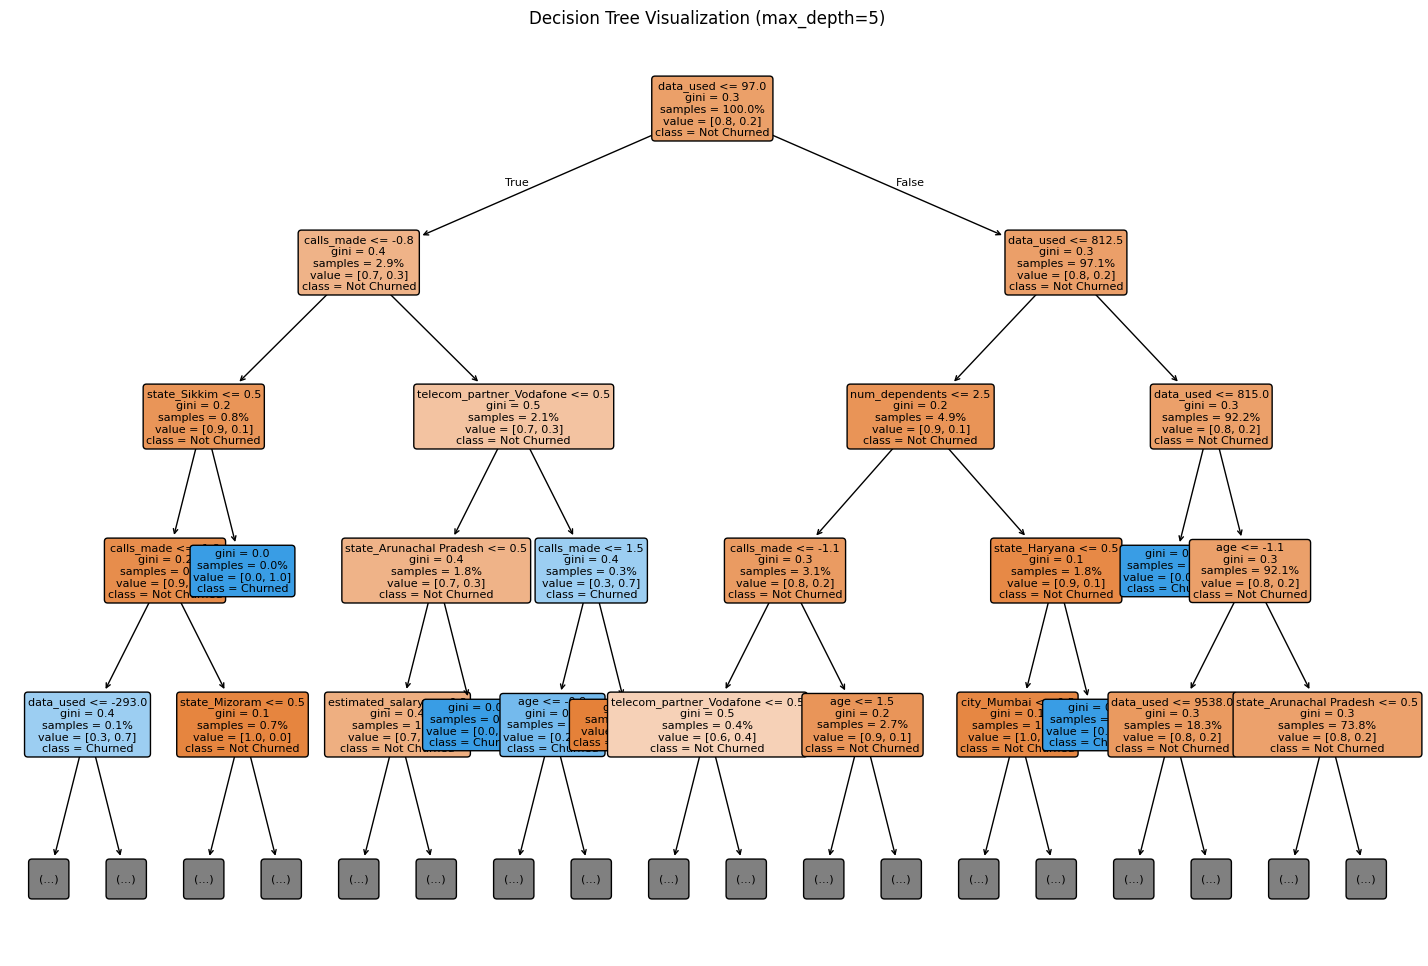

Decision Tree with max_depth=10: Accuracy = 0.78


In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define target and features for Decision Tree model
X_onehot = cleaned_onehot_df.drop(columns='churn')
y = cleaned_onehot_df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.3, random_state=42)

# Train Decision Tree with different max_depth values and compare performance
for depth in [3, 5, 10]:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = tree_clf.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Decision Tree with max_depth={depth}: Accuracy = {accuracy:.2f}')

    # Plot the tree (first 4 levels for visualization)
    if depth == 5:
        plt.figure(figsize=(18, 12))  # Increase figure size for better readability
        plot_tree(
            tree_clf, 
            max_depth=4,  # Limit tree depth for cleaner visualization
            feature_names=X_train.columns,  # Use feature names for clarity
            class_names=['Not Churned', 'Churned'],  # Add class names to the tree
            filled=True,  # Fill colors based on class labels
            rounded=True,  # Use rounded corners for better visual appeal
            fontsize=8,  # Adjust font size for better readability
            proportion=True,  # Adjust the size of each node proportionally to the sample size
            precision=1  # Reduce the decimal places shown
        )
        plt.title(f'Decision Tree Visualization (max_depth={depth})')
        plt.show()



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest: Accuracy = {accuracy_rf:.2f}')


Random Forest: Accuracy = 0.79


**Feature Importance Analysis**

C:\Users\prian\AppData\Local\Temp\ipykernel_21880\808632007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette='viridis')


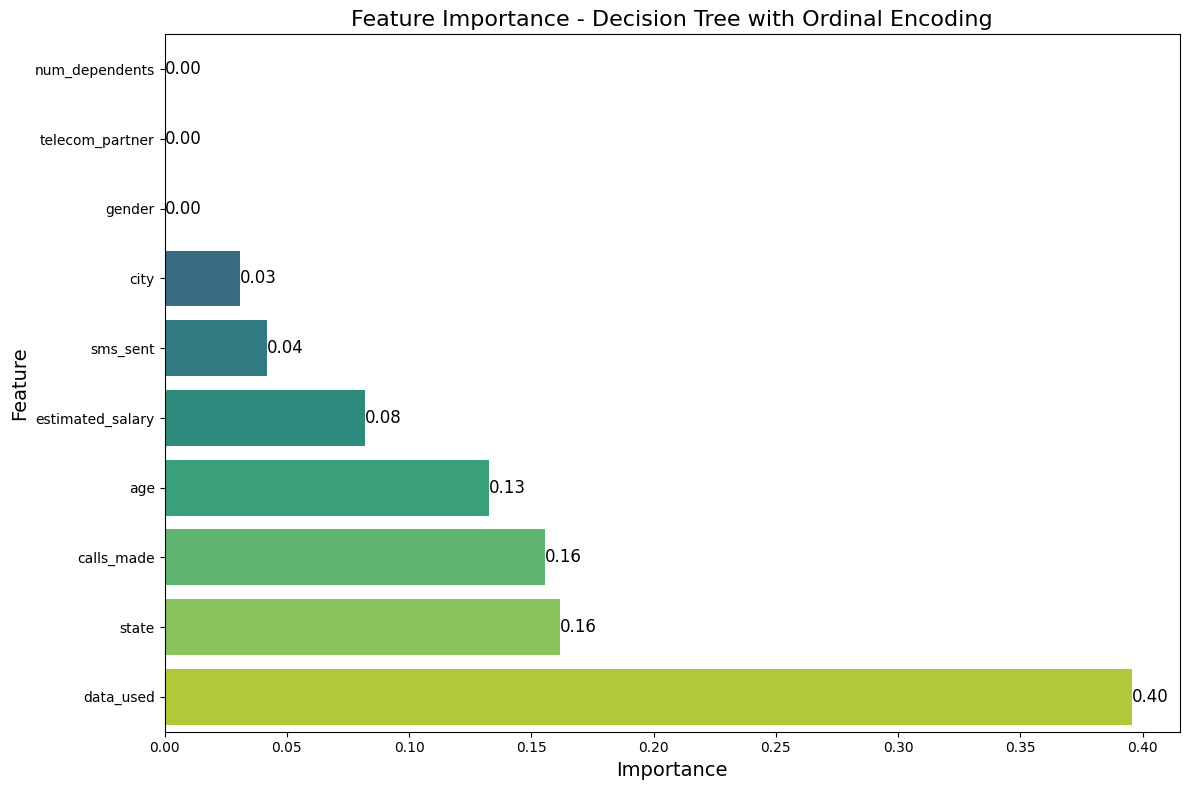

In [20]:
# Sort feature importances for better visualization
sorted_idx = importances.argsort()

# Plot feature importance using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette='viridis')

# Add values to the bars for clarity
for index, value in enumerate(importances[sorted_idx]):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12, color='black')

# Set titles and labels
plt.title('Feature Importance - Decision Tree with Ordinal Encoding', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show plot with tighter layout
plt.tight_layout()
plt.show()



**Conclusion**
- The Random Forest model performed the same in term of accuracy, but as the depth of the decision tree model became larger, the less accurate it was.
- The depth of the Decision Tree influences overfitting/underfitting, with max_depth=5 providing a good balance.
- Ordinal Encoding led to better performance with Decision Trees due to natural ordering, while OneHotEncoding works well for Random Forest.
- Important features contributing to customer churn include data_used which appears to have the highest feature importance score (around 0.40). This means that the amount of data a customer uses plays the largest role in predicting whether they will churn.
